In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parsmap/ParsMap.xlsx


# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

In [3]:
df_parsmap = pd.read_excel("/kaggle/input/parsmap/ParsMap.xlsx")

print(df_parsmap.shape)       
print(df_parsmap.columns)     
df_parsmap.head()

(50014, 4)
Index(['inFormalForm', 'formalForm', 'formalWords', 'inFormalWords'], dtype='object')


,inFormalForm,formalForm,formalWords,inFormalWords
0,من دوس دارم برم خونه درس بخونم.,من دوست دارم که به خانه بروم تا درس بخوانم.,من/دوست/دارم/بروم/خانه/درس/بخوانم,من/دوس/دارم/برم/خونه/درس/بخونم
1,میتونی منو ببری خونمون یکم نون وردارم؟,می‌توانی من را به خانه‌مان ببری تا کمی نان برد...,می‌توانی/من را/ببری/خانه‌مان/کمی/نان/بردارم,میتونی/منو/ببری/خونمون/یکم/نون/وردارم
2,رفتم درمونگاه واسه بچم دوا بگیرم، یهو بارون گرفت,به درمانگاه رفتم تا برای بچه‌ام دوا بگیرم که ی...,رفتم/درمانگاه/برای/بچه‌ام/دوا/بگیرم/یکهو/باران...,رفتم/درمونگاه/واسه/بچم/دوا/بگیرم/یهو/بارون/گرفت
3,اون که خدا شاهده مث دیوونه هاس,خدا شاهد است که او مثل دیوانه‌ها است.,شاهد است/او/که/خدا/مثل/دیوانه‌ها است,شاهده/اون/که/خدا/مث/دیوونه هاس
4,یه سری آدما هستن که هر قدر خوبی کنی اصلن انگار...,یک سری آدم‌ها هستند که هر قدر هم خوبی کنی، اصل...,یک/سری/آدم‌ها/هستند/که/هر/قدر/خوبی/کنی/اصلاً/ا...,یه/سری/آدما/هستن/که/هر/قدر/خوبی/کنی/اصلن/انگار...


In [4]:
df_parsmap.info()              
df_parsmap.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50014 entries, 0 to 50013
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   inFormalForm   50014 non-null  object
 1   formalForm     50013 non-null  object
 2   formalWords    50011 non-null  object
 3   inFormalWords  50011 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


inFormalForm     0
formalForm       1
formalWords      3
inFormalWords    3
dtype: int64

In [5]:
df_parsmap["informal_length"] = df_parsmap["inFormalForm"].str.split().str.len()
df_parsmap["formal_length"] = df_parsmap["formalForm"].str.split().str.len()

df_parsmap[["informal_length", "formal_length"]].describe()

,informal_length,formal_length
count,50014.000000,50013.000000
mean,11.359879,12.317657
std,6.457646,6.460043
min,1.000000,1.000000
25%,7.000000,8.000000
50%,10.000000,11.000000
75%,14.000000,15.000000
max,75.000000,76.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


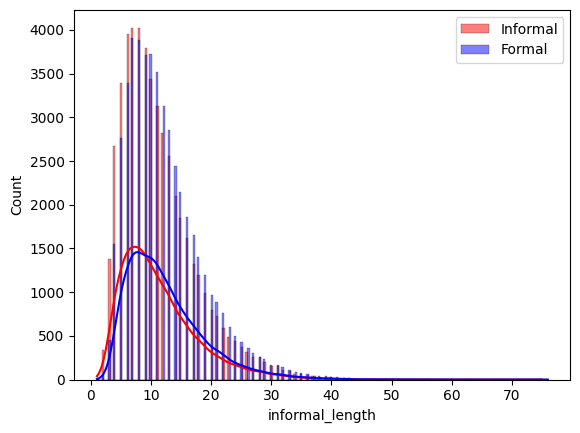

In [7]:
sns.histplot(df_parsmap["informal_length"], color="red", kde=True, label="Informal")
sns.histplot(df_parsmap["formal_length"], color="blue", kde=True, label="Formal")
plt.legend()
plt.show() # for word per sentence

In [10]:
df_parsmap["formalWords_list"] = df_parsmap["formalWords"].astype(str).apply(lambda x: x.split("/"))
df_parsmap["informalWords_list"] = df_parsmap["inFormalWords"].astype(str).apply(lambda x: x.split("/"))


formal_vocab = Counter([word for words in df_parsmap["formalWords_list"] for word in words])
informal_vocab = Counter([word for words in df_parsmap["informalWords_list"] for word in words])

print("Top 10 formal words:", formal_vocab.most_common(10))
print("Top 10 informal words:", informal_vocab.most_common(10))

Top 10 formal words: [('که', 17070), ('و', 16348), ('از', 9394), ('به', 9124), ('را', 7730), ('در', 7727), ('یک', 6606), ('این', 6243), ('من', 5573), ('با', 5321)]
Top 10 informal words: [('و', 16569), ('که', 15872), ('از', 9375), ('به', 8434), ('رو', 7920), ('تو', 6557), ('این', 6227), ('من', 5560), ('یه', 5520), ('با', 5326)]


In [11]:
overlap = set(informal_vocab.keys()) & set(formal_vocab.keys())
print(f"Vocabulary overlap: {len(overlap)} words")

Vocabulary overlap: 15378 words
